<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_ammonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ammonia (NH₃)**

[Ammonia](https://en.m.wikipedia.org/wiki/Ammonia) (NH₃) has a Trigonal pyramidal structure with three hydrogen atoms forming a triangular base.

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Ammoniak.svg/195px-Ammoniak.svg.png)


* **Tracer of Dense Interstellar Gas and Physical Conditions:** Ammonia is a crucial tracer for dense, cold interstellar gas, especially in star-forming regions. Its transitions are sensitive diagnostics for determining the kinematics, density, and temperature of molecular clouds, aiding in understanding their thermal properties and optical depths.
* **Fundamental Building Block for Prebiotic Chemistry:** NH₃ is essential for the formation of more complex nitrogen-bearing molecules, including amino acids, making it vital for understanding astrochemical evolution and prebiotic chemistry in space.
* **Widespread Presence in Diverse Astrophysical Environments:** Ammonia is detected in a variety of locations, including star-forming regions, circumstellar envelopes of evolved stars, comets, and exoplanet atmospheres, where its presence can indicate potential habitability.
* **Observable Across Radio and Microwave Wavelengths:** Its strong emissions in the radio and microwave spectrum enable detection by instruments like GBT and ALMA, allowing for detailed mapping of molecular gas distribution in various astronomical objects.
* **Insights into Isotope Chemistry:** Ammonia isotopologues, such as $^{15}\text{NH}_3$, are valuable for studying isotopic fractionation, offering clues about the conditions in the early Solar System and the interstellar medium.

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [2]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    N  0.0000  0.0000  0.2000
    H  0.0000  0.9433 -0.2000
    H  0.8165 -0.4717 -0.2000
    H -0.8165 -0.4717 -0.2000
'''

# Name
molecule = 'Ammonia (NH₃)'

In [13]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = False  # Set false, otherwise geometry optimization doesnt work
mol.spin = 0          # Ammonia is a stable, closed-shell molecule with a lone pair on the nitrogen and three N-H bonds. All electrons are paired.
# All valence electrons are paired (8 valence electrons total, including the lone pair on nitrogen). Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [4]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Ammonia (NH₃) molecule symmetry:
 Top group: Cs
 Group name: Cs
--------------------


Point Group Symmetry
* **Shape:** Trigonal Pyramidal
* **Symmetry Operations:** One $C_3$ rotation axis (along the N-H bond) and three vertical mirror planes ($\sigma_v$).
* **Point Group:** **$C_{3v}$**
* *Not linear.*

In [15]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -56.1950297883988


np.float64(-56.19502978839878)

converged SCF energy = -56.1950297883988


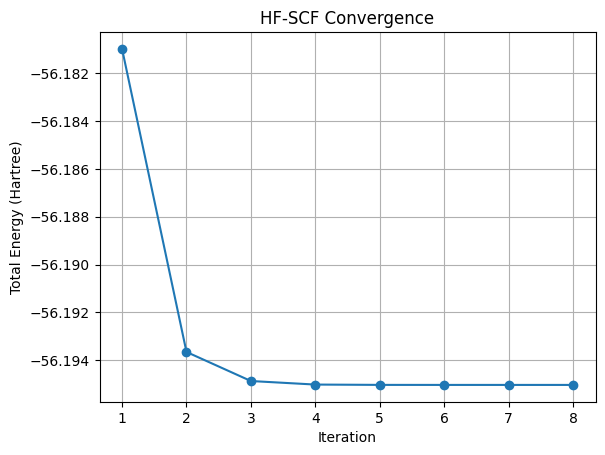

Ground state energy for Ammonia (NH₃): -56.19502978839879 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [16]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -56.5541464333647


np.float64(-56.554146433364714)

In [17]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -56.1950297883988
E(MP2) = -56.3848880155787  E_corr = -0.189858227179929
E(SCS-MP2) = -56.3852405707761  E_corr = -0.19021078237734
MP2 energy: -0.18985822717992887 Hartree


In [18]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -56.1950297883988
E(CCSD) = -56.40099455939959  E_corr = -0.205964771000792
CCSD(T) correction = -0.00392240499597009


In [19]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -56.1950297883987
Excited State energies (eV)
[ 8.4938025  10.41834095 10.41969605]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      8.49380 eV    145.97 nm  f=0.0574
Excited State   2:     10.41834 eV    119.01 nm  f=0.0412
Excited State   3:     10.41970 eV    118.99 nm  f=0.0412


In [20]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-45b1ca4d-2fe9-45e1-8eb1-e3bb6943b6ea.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000   0.200000    0.000000  0.000000  0.000000
   H   0.000000   0.943300  -0.200000    0.000000  0.000000  0.000000
   H   0.816500  -0.471700  -0.200000    0.000000  0.000000  0.000000
   H  -0.816500  -0.471700  -0.200000    0.000000  0.000000  0.000000
converged SCF energy = -56.195029788401
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0001718168     0.0151838105
1 H     0.0000000000     0.0140691947    -0.0051101976
2 H     0.0119131340    -0.0069486890    -0.0050368064
3 H    -0.0119131340    -0.0069486890    -0.0050368064
----------------------------------------------
cycle 1: E = -56.1950297884  dE = -56.195  norm(grad) = 0.0297622


Step    0 : Gradient = 1.488e-02/1.518e-02 (rms/max) Energy = -56.1950297884
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 4.36115e-01 4.36604e-01 4.36604e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000  -0.000032   0.199825    0.000000 -0.000032 -0.000175
   H   0.000000   0.923632  -0.199951    0.000000 -0.019668  0.000049
   H   0.799998  -0.461850  -0.199937   -0.016502  0.009850  0.000063
   H  -0.799998  -0.461850  -0.199937    0.016502  0.009850  0.000063
converged SCF energy = -56.1956938748782
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000     0.0000304517     0.0007056769
1 H    -0.0000000000    -0.0021675690    -0.0002264122
2 H    -0.0018252768     0.0010685587    -0.0002396323
3 H     0.0018252768     0.0010685587    -0.0002396323
----------------------------------------------
cycle 2: E = -56.1956938749  dE = -0.000664086  norm(grad) = 0.00378289


Step    1 : Displace = 1.677e-02/1.967e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.891e-03/2.179e-03 (rms/max) E (change) = -56.1956938749 (-6.641e-04) Quality = 0.868
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 4.36282e-01 4.36604e-01 4.87308e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N  -0.000000  -0.000024   0.194432   -0.000000  0.000008 -0.005393
   H   0.000000   0.928427  -0.198151    0.000000  0.004795  0.001800
   H   0.804068  -0.464251  -0.198141    0.004071 -0.002401  0.001796
   H  -0.804068  -0.464251  -0.198141   -0.004071 -0.002401  0.001796
converged SCF energy = -56.19573056252
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000007870     0.0006070516
1 H    -0.0000000000     0.0000686184    -0.0002021302
2 H     0.0000618068    -0.0000347027    -0.0002024607
3 H    -0.0000618068    -0.0000347027    -0.0002024607
----------------------------------------------
cycle 3: E = -56.1957305625  dE = -3.66876e-05  norm(grad) = 0.000711412


Step    2 : Displace = 5.159e-03/5.393e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 3.557e-04/6.071e-04 (rms/max) E (change) = -56.1957305625 (-3.669e-05) Quality = 1.096
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 4.36281e-01 4.36604e-01 5.30375e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000  -0.000023   0.193079    0.000000  0.000001 -0.001353
   H   0.000000   0.928918  -0.197699    0.000000  0.000491  0.000451
   H   0.804488  -0.464498  -0.197690    0.000420 -0.000246  0.000451
   H  -0.804488  -0.464498  -0.197690   -0.000420 -0.000246  0.000451
converged SCF energy = -56.1957315403973
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 N    -0.0000000000     0.0000002434     0.0000406553
1 H     0.0000000000     0.0000204184    -0.0000134837
2 H     0.0000176042    -0.0000103309    -0.0000135858
3 H    -0.0000176042    -0.0000103309    -0.0000135858
----------------------------------------------
cycle 4: E = -56.1957315404  dE = -9.77877e-07  norm(grad) = 5.87712e-05


Step    3 : Displace = 8.882e-04/1.353e-03 (rms/max) Trust = 2.000e-01 (+) Grad = 2.939e-05/4.066e-05 (rms/max) E (change) = -56.1957315404 (-9.779e-07) Quality = 1.045
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 4.36281e-01 4.36604e-01 5.30375e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 0.839 seconds


[[ 2.03119402e-14 -4.28424586e-05  3.64866412e-01]
 [ 9.91712433e-14  1.75540070e+00 -3.73597435e-01]
 [ 1.52026242e+00 -8.77773414e-01 -3.73579713e-01]
 [-1.52026242e+00 -8.77773414e-01 -3.73579713e-01]]


converged SCF energy = -56.1950297883988


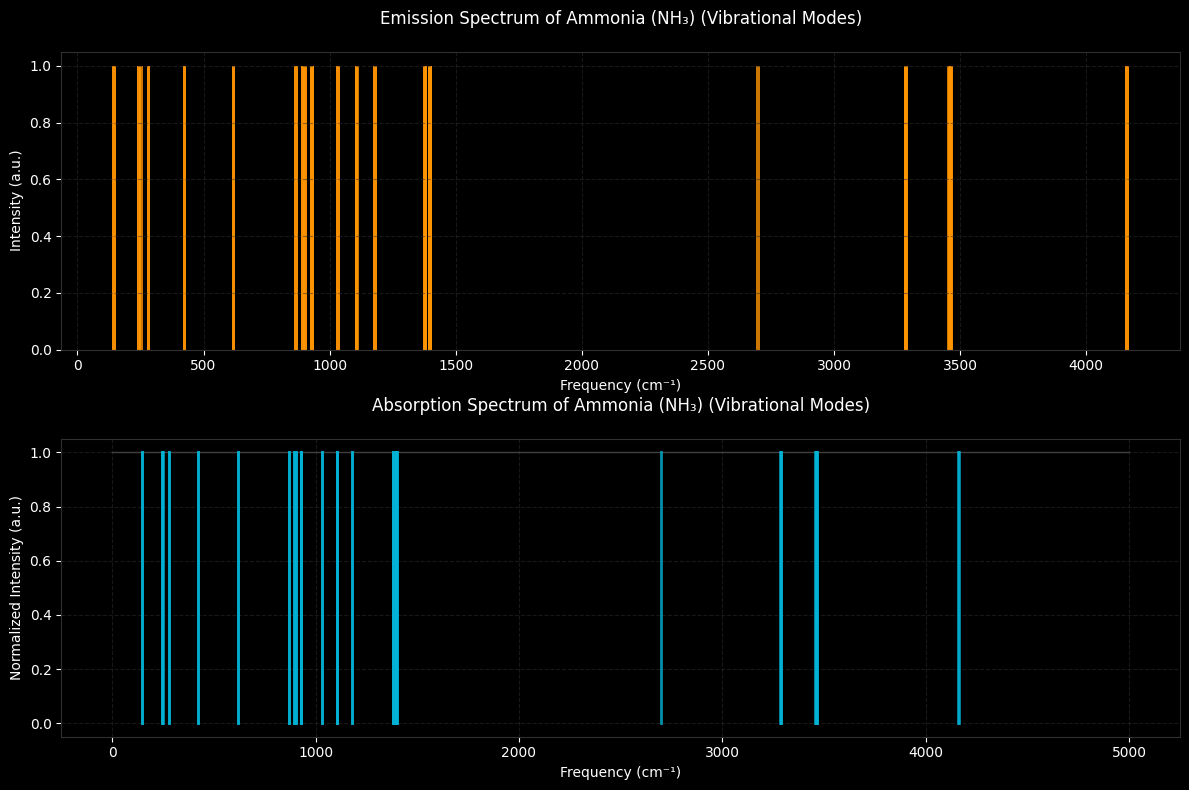

In [22]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()